# Problem

$\blacktriangleright$ Here the idea is to solve the incompressible Navier-Stokes equation coupled to an equation of advection-diffusion time dependent for the temperature evolution in time but employing the SUPG (time dependent) stabilization on the temperature equation since it suffers from instabilities given the transport field $u$, already computed from the NS equation. In turn the NS equation is splitted using the _Incremental Chorin-Theman_ method

1. The problem in strong form
\begin{equation}
    \begin{cases}
        \frac{\partial u}{\partial t} -\nu\Delta u + (u\cdot \nabla)u + \nabla p + \beta g (T-T_{ref})=0 &\qquad in \thinspace \Omega \times (0,t_f)\\
        \text{div}u=0 &\qquad in \thinspace \Omega \times (0,t_f)\\
        \frac{\partial T}{\partial t}-k\Delta T +u\cdot \nabla T=0 &\qquad in \thinspace \Omega \times (0,t_f)\\
        u=0,p=0 &\qquad in \thinspace \Omega, t=0\\
        u=0 &\qquad in \thinspace \Gamma_{4,2,5}\cup \Gamma_{bot}\\
        (-pI +\nu\nabla u)\cdot\hat{n}=0 &\qquad in \thinspace \Gamma_{3}\\
        T=20 &\qquad in \thinspace \Omega, t=0\\
        T=60 &\qquad in \thinspace \Gamma_{5}\\
        T=20 &\qquad in \thinspace \Gamma_{4,2}\cup\Gamma_{bot}\\
        \nabla T\cdot\hat{n}=0 &\qquad in \thinspace \Gamma_{3}
    \end{cases}
\end{equation}

2. Discretization of the system of equations</br>
$\bullet$ step 1
\begin{equation}
    \begin{cases}
        \frac{\tilde{u}-u^n}{\Delta t}-\nu\Delta \tilde{u} + (u^n\cdot\nabla)\tilde{u}=-\nabla p^{n}-\beta g (T^{n}-T_{ref}) &\qquad in \thinspace \Omega \times (0,t_f)\\
        \tilde{u}=0 &\qquad in \thinspace \Gamma_{4,2,5}\cup \Gamma_{bot}\\
        \nu\nabla\tilde{u}\cdot \hat{n}=0 &\qquad in \thinspace \Gamma_{3}
    \end{cases}
\end{equation}
$\bullet$ step 2
\begin{equation}
    \begin{cases}
        -\Delta \delta p =-\frac{1}{\Delta t}\text{div}\tilde{u} &\qquad in \thinspace \Omega \times (0,t_f)\\
        \nabla \delta p \cdot \hat{n}=0 &\qquad in \thinspace \Gamma_{4,2,5}\cup \Gamma_{bot}\\
        \delta p=0 &\qquad in \thinspace \Gamma_{3}
    \end{cases}
\end{equation}
$\bullet$ step 3
\begin{equation}
    \begin{cases}
    u^{n+1}=\tilde{u}-\Delta t\nabla \delta p\\
    p^{n+1}=p^n +\delta p
\end{cases}
\end{equation}
$\bullet$ step 4
\begin{equation}
        \frac{T^{n+1}-T^n}{\Delta t} -k\Delta T^{n+1} +u^{n+1}\cdot \nabla T^{n+1}=0
\end{equation}
3. Deriving the weak formulation of the problem</br>
$\blacktriangleright$ step 1
\begin{align}
    \frac{1}{\Delta t}\int_{\Omega}\tilde{u}vd\Omega +\nu\int_{\Omega}\nabla \tilde{u}:\nabla vd\Omega +\int_{\Omega}(u^n\cdot\nabla)\tilde{u}vd\Omega=-\int_{\Omega}\nabla p^n vd\Omega \\-\int_{\Omega}\beta g (T^n-T_{ref})vd\Omega +\frac{1}{\Delta t}\int_{\Omega}u^n v d\Omega
\end{align}
$\blacktriangleright$ step 2
\begin{align}
    \int_{\Omega}\nabla \delta p:\nabla q d\Omega = -\frac{1}{\Delta t}\int_{\Omega}\text{div}\tilde{u}qd\Omega
\end{align}
$\blacktriangleright$ step 3
\begin{align}
    \int_{\Omega}u^{n+1}vd\Omega=\int_{\Omega}\tilde{u}vd\Omega -\Delta t\int_{\Omega}\nabla\delta p v d\Omega
\end{align}
$\blacktriangleright$ step 4
\begin{align}
    \frac{1}{\Delta t}\int_{\Omega} T^{n+1}\psi d\Omega +\int_{\Omega}k\nabla T^{n+1}:\nabla \psi d\Omega +\int_{\Omega}u^{n+1}\cdot \nabla T^{n+1}\psi d\Omega=\frac{1}{\Delta t}\int_{\Omega}T^n\psi d\Omega
\end{align}
4. Functional Spaces
5. Introduction of the SUPG stabilization. The main idea of this stabilization procedure is separate the PDE we want to stabilize in its _symmetric_ and _skewsymmetric_ portion testing and integrating over the area in this 2D case. At the very end SUPG is nothing more than adding stabilizing terms to the PDE but withou changing to much the original problem. Therefore we will have
\begin{align}
M(T,\psi) + a(T,\psi) +b(u,T,\psi)+\sum_{k\in \mathcal{T}}\delta_K\int_{\Omega}(\mathcal{L^{s}}-F)\cdot(\mathcal{L^{ss}})d\Omega=m(T,\psi)
\end{align}
Now
\begin{align}
\mathcal{L}^s &=\bigg(\frac{T^{n+1}}{\Delta t} -k\Delta T^{n+1} +u^{n+1}\cdot \nabla T^{n+1}\bigg)\\
F&=\bigg(\frac{T^{n}}{\Delta t}\bigg)\\
\mathcal{L^{ss}}&=\bigg(u^{n+1}\cdot \nabla \psi +\frac{1}{2}\text{div}u^{n+1}\psi\bigg)
\end{align}
NB. either the _mass matrix_ $M(T,\psi); m(T,\psi)$ and the diffusion matrix (written in laplacian only for the div-grad formulation in NS it won't be symmetric at all) are symmetric thus their skewsymmetric part is null! The skewsymmetric part is written in its stabilized form (avoiding possible backflow problems) in order to recover the skewsymmetricity. Now the weak formulation of the temperature equation SUPG stabilized is
\begin{align}
    \frac{1}{\Delta t}\int_{\Omega} T^{n+1}\psi d\Omega +\int_{\Omega}k\nabla T^{n+1}:\nabla \psi d\Omega +\int_{\Omega}u^{n+1}\cdot \nabla T^{n+1}\psi d\Omega \\+\sum_{k\in \mathcal{T}}\delta_K \int_{\Omega}\bigg(\frac{T^{n+1}}{\Delta t} -k\Delta T^{n+1} +u^{n+1}\cdot \nabla T^{n+1}\bigg)\cdot \bigg(u^{n+1}\cdot \nabla \psi +\frac{1}{2}\text{div}u^{n+1}\psi\bigg)d\Omega =\\ \frac{1}{\Delta t}\int_{\Omega}T^n\psi d\Omega +\sum_{k\in \mathcal{T}}\delta_K \int_{\Omega}\bigg(\frac{T^n}{\Delta t}\bigg)\cdot\bigg(u^{n+1}\cdot \nabla \psi +\frac{1}{2}\text{div}u^{n+1}\psi\bigg)d\Omega
\end{align}
the dimesion of $\delta_K$ depends on the mesh size, $k\in\mathcal{T}$ are the elements of the triangulation (the element of the mesh)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

In [ ]:
from firedrake import *
import matplotlib.pyplot as plt
import numpy as np

from firedrake.petsc import PETSc

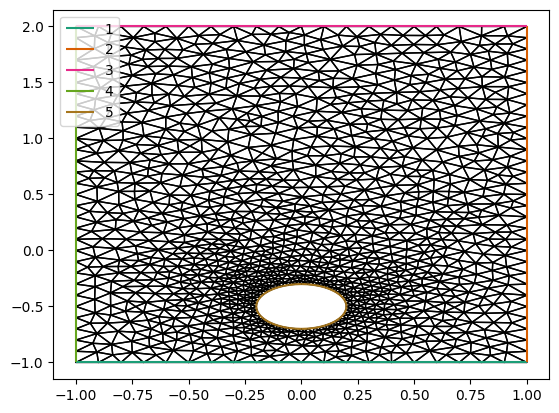

In [ ]:
# Import mesh: set the path correctly!
mesh = Mesh('/content/drive/MyDrive/meshes/cyl240109.msh')
fig, ax = plt.subplots()
triplot(mesh, axes=ax)
ax.legend(loc='upper left')

In [ ]:
V=VectorFunctionSpace(mesh,'P',2)
Q=FunctionSpace(mesh,'P',1)
Z=FunctionSpace(mesh,'P',1)

x=SpatialCoordinate(mesh)
u_noslip=Constant((0,0))
bc_noslip=DirichletBC(V,u_noslip,(1,2,4,5))
bcsU=(bc_noslip)

#pressure
p_null=Constant(0)
bc_p_null=DirichletBC(Q,p_null,3)
bcsP=(bc_p_null)
#temp
T_cyl=Constant(60)
T_boundary=Constant(20)
bc_cyl=DirichletBC(Z,T_cyl,5)
bc_boundary=DirichletBC(Z,T_boundary,(4,2,1))
bcsT=(bc_cyl,bc_boundary)

g=as_vector((0,-9.8))
alpha=0.001
beta=0.0002
nu=0.01
Tref=20
dt=1
T=200

In [ ]:
def predictor_form(u,v,u_old,p_old,t_old,Tref,nu,beta):
  a=1/dt*inner(u,v)*dx\
    +nu*inner(grad(u),grad(v))*dx\
    +dot(dot(grad(u),u_old),v)*dx
  L=-inner(grad(p_old),v)*dx\
    -beta*(t_old-Tref)*dot(g,v)*dx
  return a,L

def pressure_form(dp,q,dt,u_tilde):
  a=inner(grad(dp),grad(q))*dx
  L=-1/dt*div(u_tilde)*q*dx
  return a,L

def velocity_update(u,v,u_tilde,dph,dt):
  a=inner(u,v)*dx
  L=inner(u_tilde,v)*dx\
    -dt*inner(grad(dph),v)*dx
  return a,L





def temp_form(t,psi,t_old,alpha,dt,uh):
  ubar=Function(FunctionSpace(mesh,'DG',0))
  ubar.project(sqrt(inner(uh,uh)))
  h=CellDiameter(mesh)
  delta_K=Function(ubar.function_space())
  delta_K=0.2*h/(ubar)

  a=1/dt*inner(t,psi)*dx\
      + alpha*inner(grad(t),grad(psi))*dx\
      + dot(dot(grad(t),uh),psi)*dx\
      + delta_K * (1/dt*t - alpha*div(grad(t)) + inner(uh, grad(t)) ) * \
            ( inner(uh, grad(psi)) + 0.5 * div(uh) * psi) * dx


  L=1/dt*dot(t_old,psi)*dx\
    + delta_K * (1/dt*t_old) * \
            (+ inner(uh, grad(psi)) + 0.5 * div(uh) * psi) * dx
  return a,L

In [ ]:
u=TrialFunction(V)
v=TestFunction(V)
dp=TrialFunction(Q)
q=TestFunction(Q)
t=TrialFunction(Z)
psi=TestFunction(Z)

uh=Function(V)
dph=Function(Q)
th=Function(Z)

uh.interpolate(u_noslip)
dph.interpolate(p_null)
th.interpolate(Tref)

uh_old=Function(V)
ph_old=Function(Q)
th_old=Function(Z)

uh_old.assign(uh)
ph_old.assign(dph)
th_old.assign(th)


a1,L1=predictor_form(u,v,uh_old,ph_old,th_old,Tref,nu,beta)
problem1=LinearVariationalProblem(a1,L1,uh,bcsU)
solver1=LinearVariationalSolver(problem1)

a2,L2=pressure_form(dp,q,dt,uh)
problem2=LinearVariationalProblem(a2,L2,dph,bcsP)
solver2=LinearVariationalSolver(problem2)

a3,L3=velocity_update(u,v,uh,dph,dt)
problem3=LinearVariationalProblem(a3,L3,uh)
solver3=LinearVariationalSolver(problem3)


a4,L4=temp_form(t,psi,th_old,alpha,dt,uh)
problem4=LinearVariationalProblem(a4,L4,th,bcsT)
solver4=LinearVariationalSolver(problem4)

In [ ]:
def mean_temp(th,label):
  lenght=assemble(1*ds(label,domain=mesh))
  temp=assemble(th*ds(label,domain=mesh))
  return temp/lenght


normal=FacetNormal(mesh)

In [ ]:
t_vec = np.arange(0, T+0.1*dt, dt)

meant=[0]*len(t_vec)
meant[0]=mean_temp(th_old,3)

drag_vec=[0]*len(t_vec)
lift_vec=[0]*len(t_vec)

for ii in range(1, len(t_vec)):     # start from 1 to skip t=0
    t_val = t_vec[ii]
    print('Time = ', t_val)
    print('||u||_H^{1}',norm(uh,'H1'),'||p||_L^2',norm(dph,'L2'),'||T||_L^2',norm(th,'L2'))

    a1,L1=predictor_form(u,v,uh_old,ph_old,th_old,Tref,nu,beta)
    problem1=LinearVariationalProblem(a1,L1,uh,bcsU)
    solver1=LinearVariationalSolver(problem1)
    solver1.solve()

    a2,L2=pressure_form(dp,q,dt,uh)
    problem2=LinearVariationalProblem(a2,L2,dph,bcsP)
    solver2=LinearVariationalSolver(problem2)
    solver2.solve()

    a3,L3=velocity_update(u,v,uh,dph,dt)
    problem3=LinearVariationalProblem(a3,L3,uh)
    solver3=LinearVariationalSolver(problem3)
    solver3.solve()


    a4,L4=temp_form(t,psi,th_old,alpha,dt,uh)
    problem4=LinearVariationalProblem(a4,L4,th,bcsT)
    solver4=LinearVariationalSolver(problem4)
    solver4.solve()

    uh_old.assign(uh)
    ph_old.assign(dph)
    th_old.assign(th)

    meant[ii]=mean_temp(th_old,3)
    drag_vec[ii] = assemble( inner( ph_old*normal - nu*dot(grad(uh_old), normal), Constant((1.,0.)) ) * ds(5) )
    lift_vec[ii] = assemble( inner( ph_old*normal - nu*dot(grad(uh_old), normal), Constant((0.,1.)) ) * ds(5) )

Time =  1.0
||u||_H^{1} 0.0 ||p||_L^2 0.0 ||T||_L^2 48.47582053898421
Time =  2.0
||u||_H^{1} 1.8233218158095275e-17 ||p||_L^2 8.815329139559442e-18 ||T||_L^2 49.55885873709407
Time =  3.0
||u||_H^{1} 0.02499230975165265 ||p||_L^2 0.00045392720134988844 ||T||_L^2 50.10687392424924
Time =  4.0
||u||_H^{1} 0.03647884866833299 ||p||_L^2 0.0005063721466275382 ||T||_L^2 50.53489654615998
Time =  5.0
||u||_H^{1} 0.045651762698994854 ||p||_L^2 0.0008271746259114717 ||T||_L^2 50.89699974918124
Time =  6.0
||u||_H^{1} 0.05211500743598627 ||p||_L^2 0.0009218298733633094 ||T||_L^2 51.21687995482203
Time =  7.0
||u||_H^{1} 0.05780413832220699 ||p||_L^2 0.0011747501594259122 ||T||_L^2 51.50683991546167
Time =  8.0
||u||_H^{1} 0.06225164794757029 ||p||_L^2 0.0012897348935392583 ||T||_L^2 51.77405972168858
Time =  9.0
||u||_H^{1} 0.06631279195368593 ||p||_L^2 0.0015032662397008914 ||T||_L^2 52.023194884712524
Time =  10.0
||u||_H^{1} 0.06967354486462297 ||p||_L^2 0.0016282531690024976 ||T||_L^2 52.25

Text(0.5, 1.0, 'temperature')

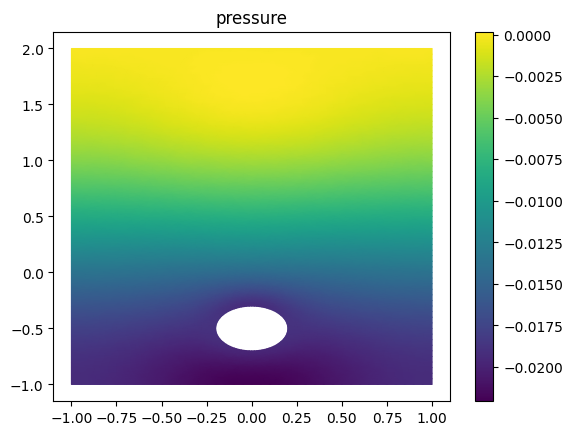

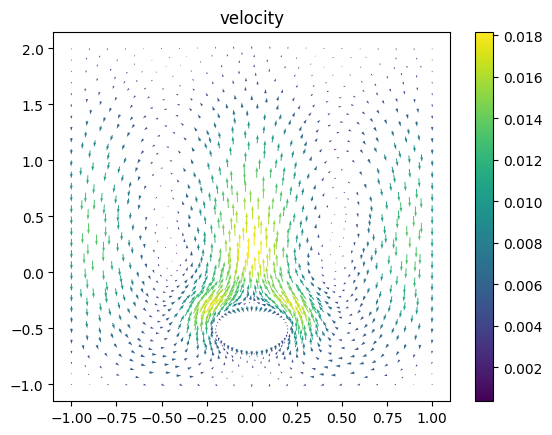

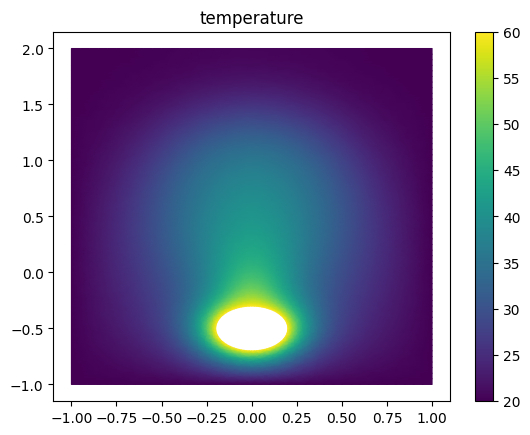

In [ ]:
fig, ax = plt.subplots()
col = tripcolor(dph, axes=ax)
plt.colorbar(col)
plt.title('pressure')
fig, ax = plt.subplots()
col = quiver(uh, axes=ax)
plt.colorbar(col)
plt.title('velocity')
fig, ax = plt.subplots()
col = tripcolor(th, axes=ax)
plt.colorbar(col)
plt.title('temperature')

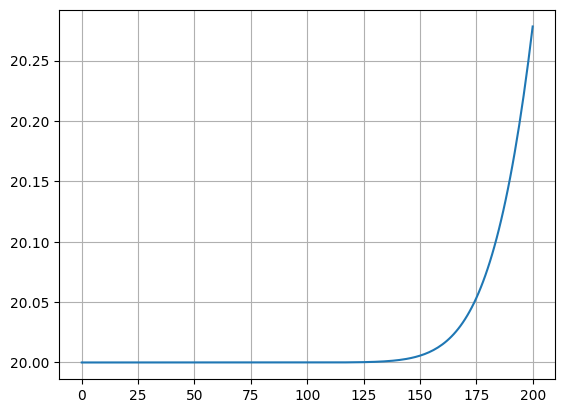

In [ ]:
plt.plot(t_vec,meant)
plt.grid()

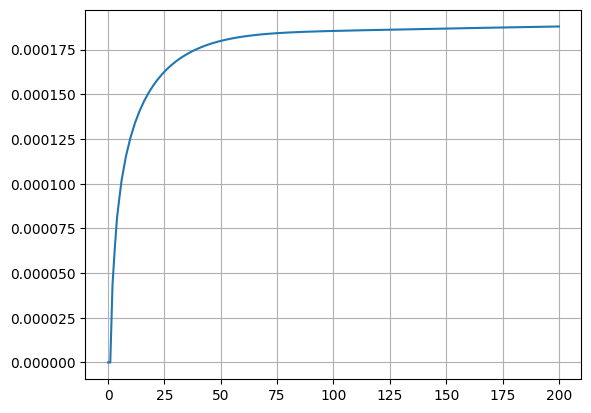

In [ ]:
plt.plot(t_vec,drag_vec)

plt.grid()

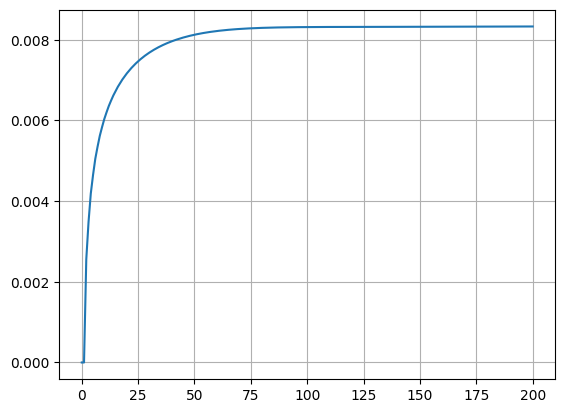

In [ ]:
plt.plot(t_vec,lift_vec)
plt.grid()